In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)
matplotlib.rcParams['font.size']=14

In [3]:
def calculate_fourier_conversion(Boxsize):
    '''
    Takes the Boxsize in kpc and produces the conversion factors
    from Fourier units to physical units. For use with genPK output.
    '''
    Boxsize = Boxsize / 1000 # convert to Mpc

    k_conv = 2*np.pi / Boxsize
    p_conv = (Boxsize / (2 * np.pi))**3
    
    return k_conv, p_conv

In [4]:
def wnumber2wlength(k):
    return 1/k
def wlength2wnumber(l):
    return 1/l

In [5]:
def get_genPK_data(fpath, k_conv, p_conv):
    
    genPK = np.loadtxt(fpath)
    
    bins = genPK[:, 0]
    pk = genPK[:, 1]
    
    dk = pk * (2 * np.pi)**3 * (4 * np.pi) * bins**3
    
    bins = genPK[:, 0] * k_conv
    
    pk = genPK[:, 1] * p_conv
    
    return bins, pk, dk

In [16]:
i = 3

fpath = '/home/ryan/Downloads/run_gevolution_L3N256/genpk/'

fi = 'PK-DM-lcdm_snap00{}_cdm'.format(i)

#fi = 'lcdm_pk005_hij.dat'

f = fpath + fi

pkpath_1 = '/home/ryan/genPK/run_L3N256_DM//'
cdm_str = 'PK-DM-snap_00{}_CDM.hdf5'

In [17]:
k_conv, p_conv = calculate_fourier_conversion(3000)

bins_gev, pk_gev, dk_gev = get_genPK_data(f, k_conv, p_conv)
bins_are, pk_are, dk_are = get_genPK_data(pkpath_1 + cdm_str.format(7), k_conv, p_conv)

/home/ryan/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


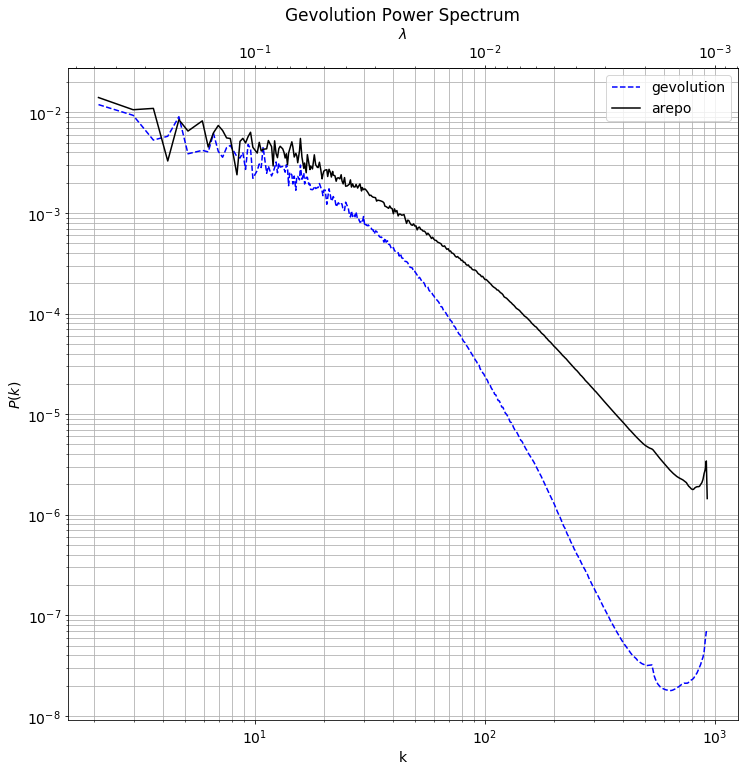

In [18]:
fig, ax = plt.subplots(figsize=[12,12])
ax.plot(bins_gev, pk_gev, '--', label='gevolution', color='b')
ax.plot(bins_are, pk_are, label='arepo', color='k')

ax.set_xlabel('k')
ax.set_ylabel('$P(k)$')
ax.set_xscale('log')
ax.set_yscale('log')


#ax.set_xlim(0, 10**3)

sax = ax.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
sax.set_xlabel('$\lambda$')
plt.title('Gevolution Power Spectrum')
plt.legend()
plt.grid(True, which="both", ls="-")
plt.show()